<a target="_blank" href="https://colab.research.google.com/github/EstebanVincent/Convolutions-Vision-Transformers/blob/main/Submission.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

University of Rome, La Sapienza. Artificial Intelligence and Robotics. Neural Networks Course A.Y. 2022/23

Esteban Vincent | Aurélien Lurois

# Convolutions Vision Transformers

Implementation of [CvT: Introducing Convolutions to Vision Transformers](https://arxiv.org/abs/2103.15808)

The Convolutional Vision Transformer (CvT) model is a new architecture that improves the performance and efficiency of the existing Vision Transformer (ViT). It does this by introducing convolutions into ViT, combining desirable properties from both designs. This includes shift, scale and distortion invariance from CNNs as well as dynamic attention, global context and better generalization capabilities of Transformers. The CvT model has been validated through extensive experiments which show it achieves state-of-the-art performance over other vision transformers on ImageNet 1k with fewer parameters and lower FLOPs. In addition to this improved accuracy when pre-trained on larger datasets such as ImageNet 22K was also maintained during fine tuning for downstream tasks. Finally positional encoding can be safely removed in our models simplifying design for higher resolution vision tasks.

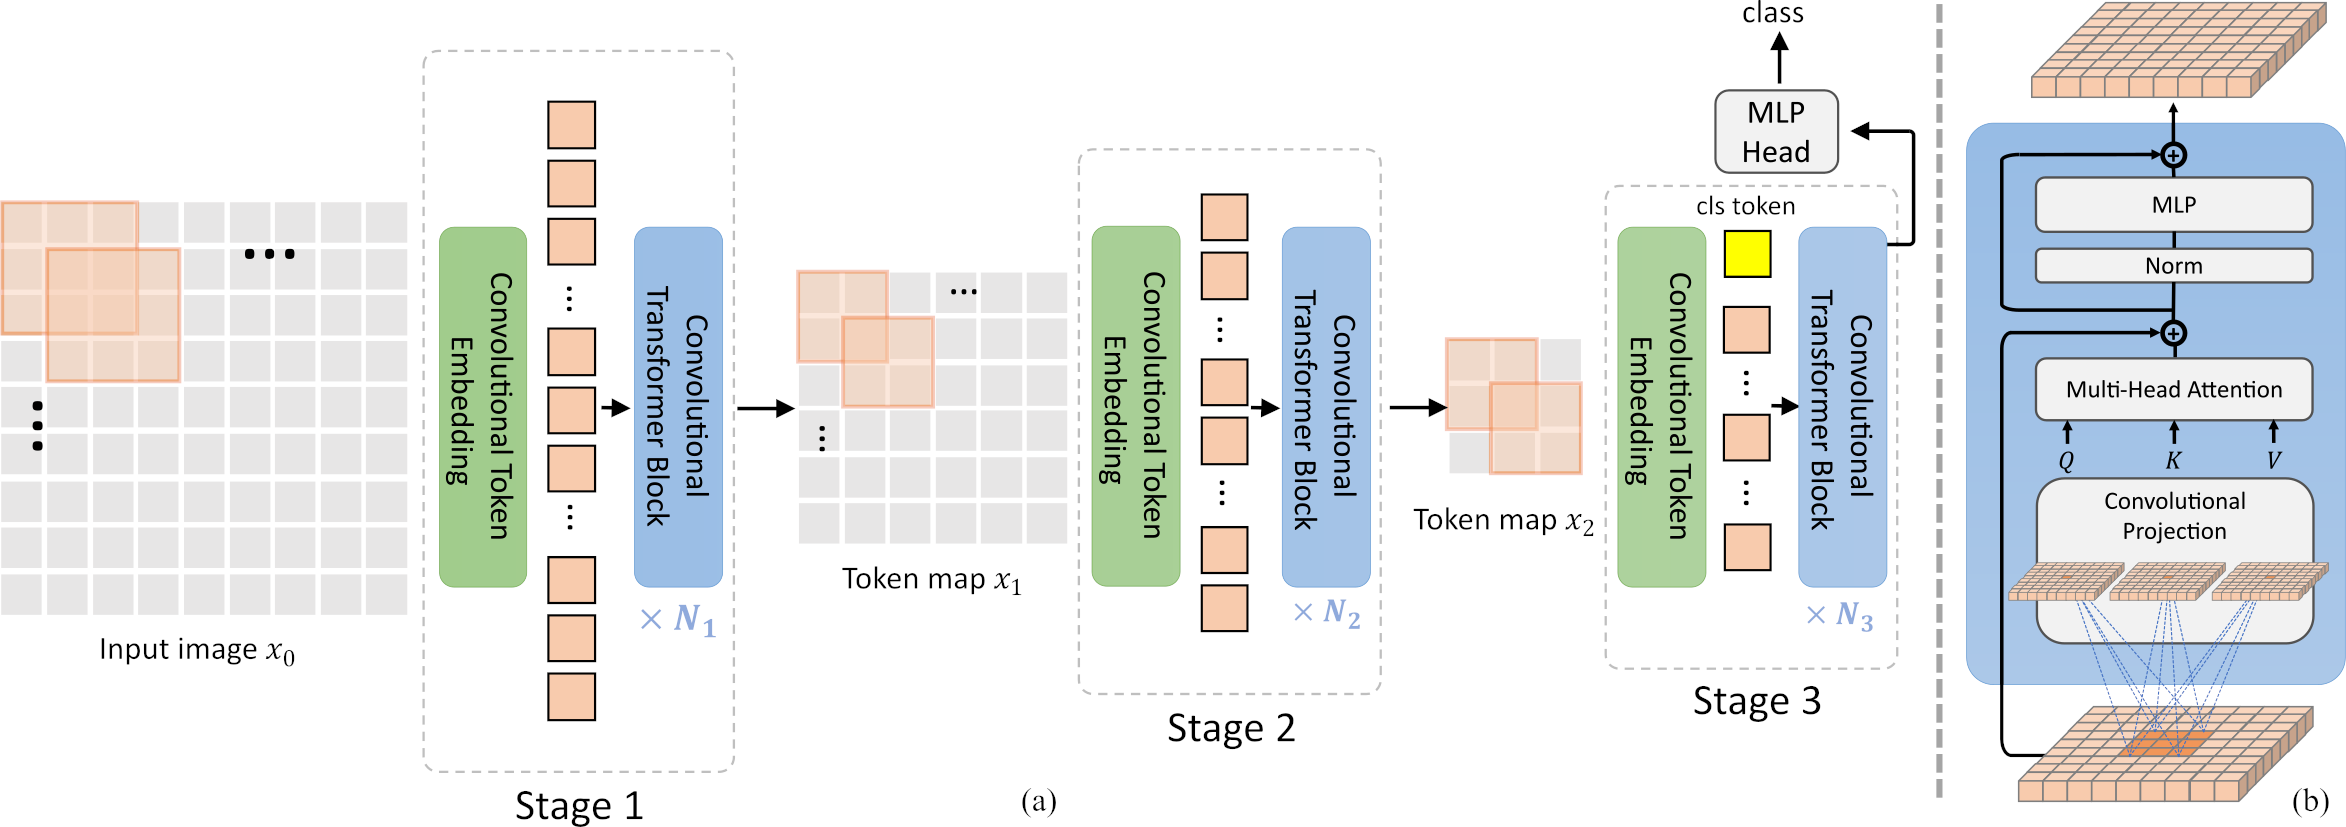 <br>
Pipeline of the CvT architecture. (a) Overall architecture. (b) Details of the Convolutional Transformer Block.<br>

## Architecture

The Convolutional Vision Transformer (CvT) architecture consists of two convolution-based operations: Convolutional Token Embedding and Convolutional Projection. It uses a three-stage hierarchical design, where each stage first consists of a Convolutional Token Embedding layer that uses convolution with overlapping patches to reformat the tokens into a 2D grid, followed by a normalisation layer. The next steps consist of a stack of Convolutional Transformer Blocks, which use a Convolutional Projection instead of the standard linear projection for the Multi-Head Self-Attention module. Finally, an MLP (fully connected neural network) is used to predict the class from the classification token in the last step.

## Convolutional Token Embedding

The Convolutional Token Embedding layer in the Convolutional Vision Transformer (CvT) models local spatial contexts, from low-level edges to higher order semantic primitives, through a multi-stage hierarchy approach similar to CNNs. It maps a 2D image or 2D reshaped token map from a previous stage into new tokens through a 2D convolution operation. This layer adjusts the token feature dimension and number of tokens at each stage, allowing the tokens to represent increasingly complex visual patterns over larger spatial footprints.

## Convolutional Projection

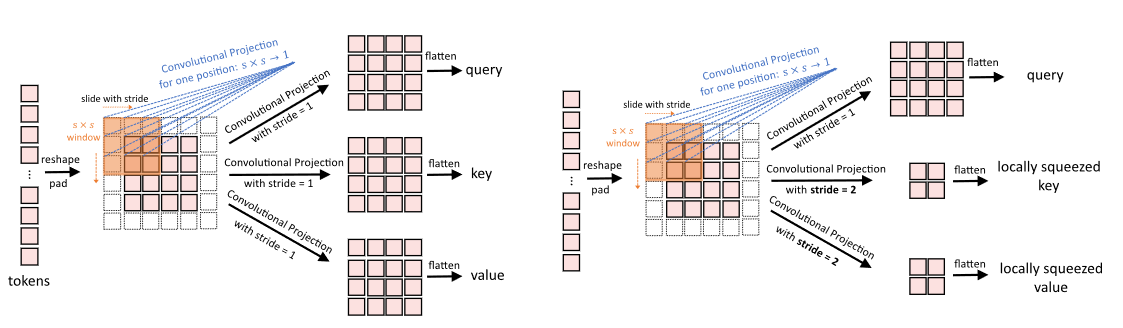<br>
Convolutional projection and squeezed convolutional projection.<br><br>

The Convolutional Projection layer is a proposed addition to the Transformer block that enhances the modeling of local spatial context while also improving efficiency. Unlike previous works that added convolution modules to the Transformer block, the Convolutional Projection layer replaces the original linear projection in Multi-Head Self-Attention with depth-wise separable convolutions, resulting in a simpler design and reduced computational cost.

# Dataset Description: Tom & Jerry Image Classification

Dataset used: [Tom and Jerry Image classification | Kaggle](https://www.kaggle.com/datasets/balabaskar/tom-and-jerry-image-classification)

This dataset contains more than 5k images (exactly 5478 images) extracted from some of Tom & Jerry's show videos that are available online. The downloaded videos were converted into images with 1 frame per second (1 FPS) and hand-labeled to detect the presence of characters Tom and Jerry'jerry' in any given image. The images are categorized into 4 classes: no characters present, only Jerry, only Tom, or both. We have preprocessed the dataset to shuffle all images into one folder, resize the images from 1280\*720 and 854\*480 to 128\*128 pixels, and create a csv file that associates each image with its class label.<br>
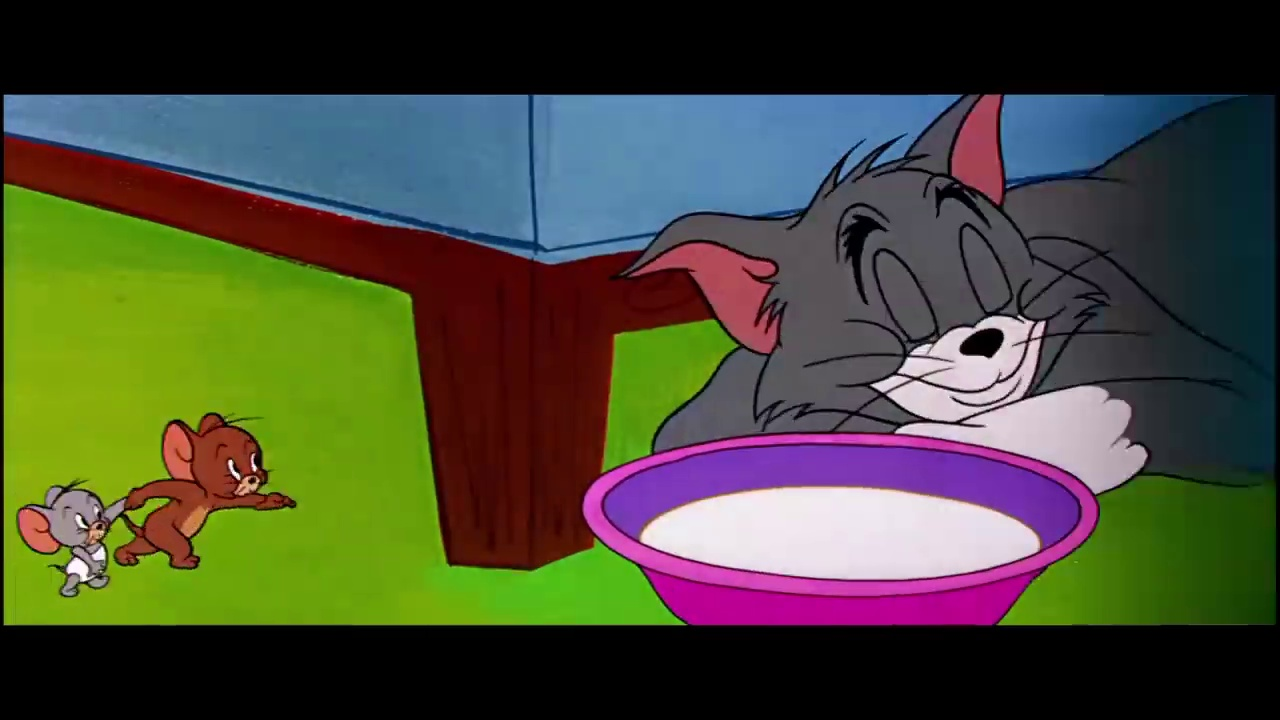 <br>
Original image<br>

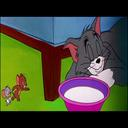 <br>
Preprocessed image

# Setup

In [1]:
#@title Clone the repository
# You do not need to run this cell if you have already cloned the repository
!git clone https://github.com/EstebanVincent/Convolutions-Vision-Transformers.git
%cd Convolutions-Vision-Transformers/
!ls

Cloning into 'Convolutions-Vision-Transformers'...
remote: Enumerating objects: 136, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 136 (delta 11), reused 28 (delta 7), pack-reused 104
Receiving objects: 100% (136/136), 230.12 MiB | 28.75 MiB/s, done.
Resolving deltas: 100% (59/59), done.
Updating files: 100% (17/17), done.
/content/Convolutions-Vision-Transformers
cvt	     figures  models	 requirements.txt  Submission.ipynb
dataset.zip  main.py  README.md  setup.py


In [2]:
#@title Install dependencies
!pip install -q -r requirements.txt 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 KB 703.8 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [3]:
#@title Import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from PIL import Image
import seaborn as sns
from sklearn.metrics import confusion_matrix
import zipfile

In [4]:
#@title Define variables
model_name = 'CvT'
n_epochs = 70
batch_size = 64
output_dir = 'models' 
lr = 1e-4
size = 128

In [5]:
#@title Unzip the preprocessed dataset
with zipfile.ZipFile("dataset.zip","r") as zip_ref:
    zip_ref.extractall()

In [ ]:
#@title Preprocessing the dataset
# Run only if you wish to preprocess the dataset again 
# (to change the size of the images for example).
# Note that you need to have the kaggle API key configured 
# and that this will download a 456 MB archive.
!python main.py --setup --size $size

# Training

In [ ]:
#@title Train the model
# For 70 epochs, this will take about 30 minutes on a Colab GPU.
# Note that a model with 70 epochs has already been trained and saved in the models folder.
!python main.py --train                         \
                --model_name $model_name        \
                --n_epochs $n_epochs            \
                --batch_size $batch_size        \
                --output_dir $output_dir        \
                --lr $lr                        \
                --size $size

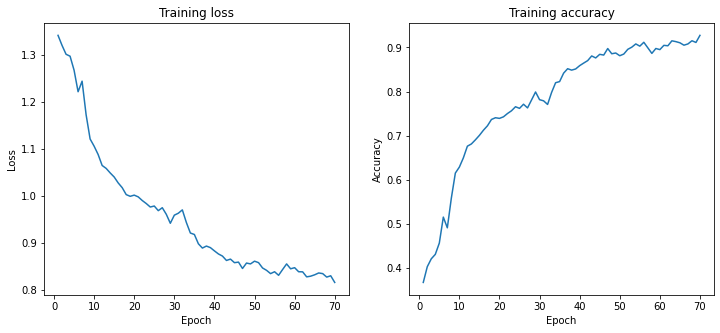

In [6]:
#@title Tracing the evolution of loss and accuracy over time
df = pd.read_csv(f'{output_dir}/{model_name}_loss_acc.csv')
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Tracing the evolution of loss over time
ax[0].plot(df['epoch'], df['loss'])
ax[0].set_xlabel('Epoch')
ax[0].set_ylabel('Loss')
ax[0].set_title('Training loss')

# Tracing the evolution of accuracy over time
ax[1].plot(df['epoch'], df['accuracy'])
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Accuracy')
ax[1].set_title('Training accuracy')

plt.show()

# Evaluation

In [7]:
#@title Evaluate the model
!python main.py --evaluate                      \
                --model_name $model_name        \
                --size $size                    \
                --batch_size $batch_size        \
                --output_dir $output_dir

Images: 100% 18/18 [00:10<00:00,  1.66it/s]
Accuracy: 0.8357664233576643


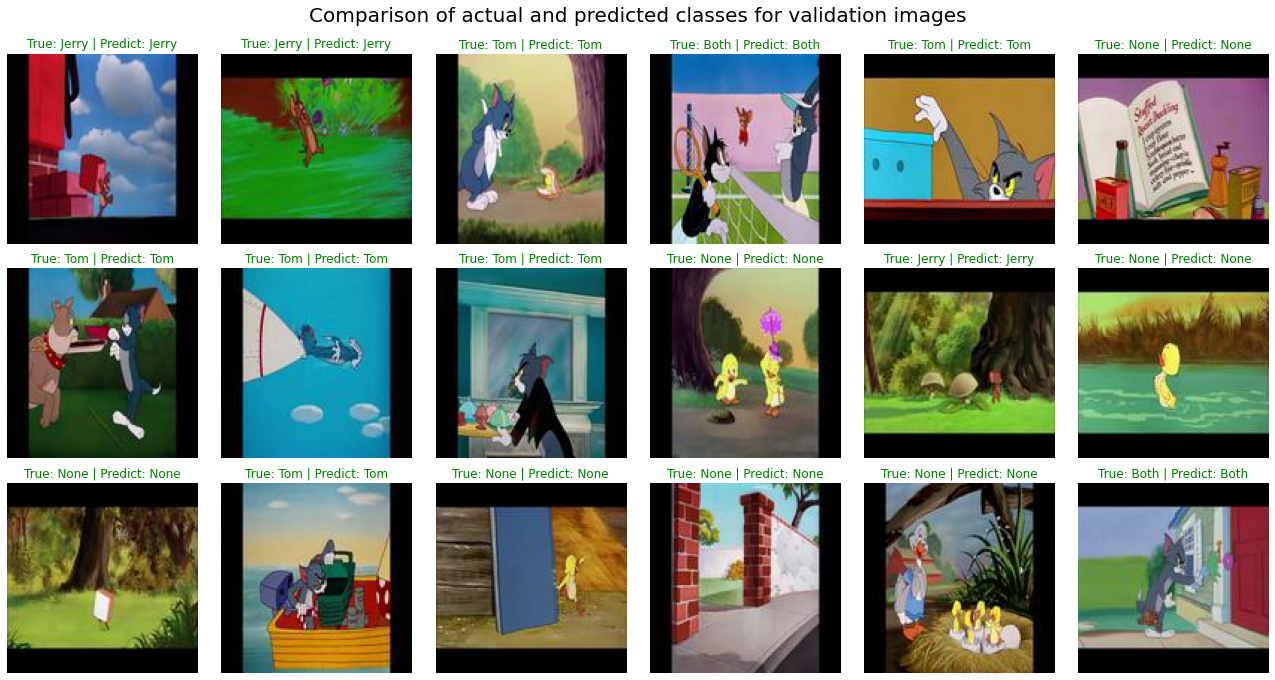

In [8]:
#@title Display results
label_name = ['None', 'Jerry', 'Tom', 'Both']

df = pd.read_csv(f'{output_dir}/{model_name}_prediction.csv')
df_sample = df.sample(n=18, random_state=42).reset_index(drop=True)

fig = plt.figure(figsize=(18, 10))

for i, row in df_sample.iterrows():
    if i >= 18: break
    image = Image.open('dataset/imgs/' + row['filename'])
    ax = fig.add_subplot(3, 6, i + 1)
    ax.imshow(image)
    ax.set_title(f"True: {label_name[row['class']]} | Predict: {label_name[row['prediction']]}",
                 color=("green" if row['class'] == row['prediction'] else "red"))
    ax.axis("off")

fig.suptitle("Comparison of actual and predicted classes for validation images", fontsize=20)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

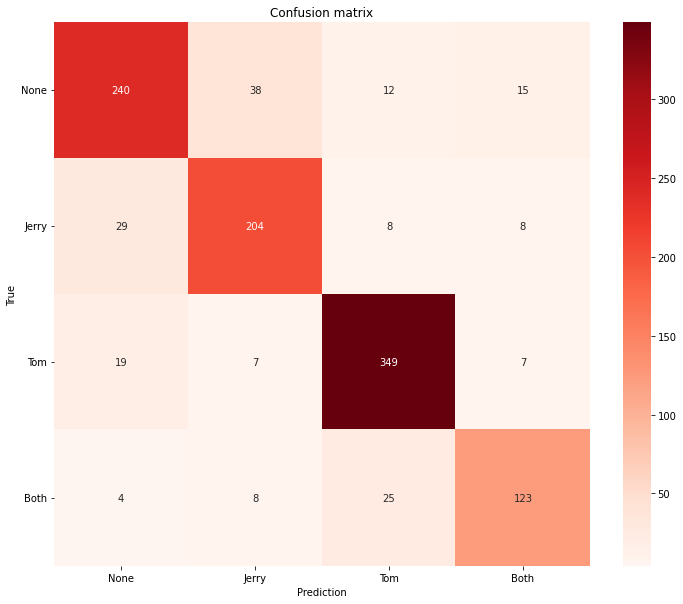

In [9]:
#@title Confusion matrix
cm = confusion_matrix(df['class'], df['prediction'])
fig = plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, cmap="Reds", fmt='d')
plt.xlabel("Prediction")
plt.ylabel("True")
plt.title("Confusion matrix")
plt.xticks(np.arange(len(label_name))+.5, label_name)
plt.yticks(np.arange(len(label_name))+.5, label_name, rotation=0)
plt.show()

The confusion matrix shows that the model is doing very well in detecting the presence of Tom. However, it has a bit of a harder time recognizing Jerry, which can be explained by his smaller size, making him easily confused with a background element.